# Question 1

At first, let's get the necessary packages.

In [116]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.datasets import copper
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

and here is our data...

In [14]:
from statsmodels.datasets import copper

prices = copper.data.load_pandas()
prices = prices['data']
prices


,WORLDCONSUMPTION,COPPERPRICE,INCOMEINDEX,ALUMPRICE,INVENTORYINDEX,TIME
0,3173.0,26.56,0.70,19.76,0.98,1.0
1,3281.1,27.31,0.71,20.78,1.04,2.0
2,3135.7,32.95,0.72,22.55,1.05,3.0
3,3359.1,33.90,0.70,23.06,0.97,4.0
4,3755.1,42.70,0.74,24.93,1.02,5.0
5,3875.9,46.11,0.74,26.50,1.04,6.0
6,3905.7,31.70,0.74,27.24,0.98,7.0
7,3957.6,27.23,0.72,26.21,0.98,8.0
8,4279.1,32.89,0.75,26.09,1.03,9.0
9,4627.9,33.78,0.77,27.40,1.03,10.0


Let us try to predict INCOMINDEX via the other features and build our model as follow

In [72]:
model1 = ols('INCOMEINDEX ~ TIME + WORLDCONSUMPTION  + COPPERPRICE  + ALUMPRICE + INVENTORYINDEX  ', prices).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            INCOMEINDEX   R-squared:                       0.985
Model:                            OLS   Adj. R-squared:                  0.981
Method:                 Least Squares   F-statistic:                     248.2
Date:                Tue, 29 Mar 2022   Prob (F-statistic):           1.28e-16
Time:                        18:09:00   Log-Likelihood:                 65.855
No. Observations:                  25   AIC:                            -119.7
Df Residuals:                      19   BIC:                            -112.4
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            0.6635      0.129      5.150      0.000       0.394       0.933
TIME                 0.0153      0.004      4.303      0.000       0.008       0.023
WORLDCONSUMPTION  7.482e-06   1.64e-05      0.455      0.654   -2.69e-05    4.19e-05
COPPERPRICE          0.0030      0.001      3.555      0.002       0.001       0.005
ALUMPRICE           -0.0121      0.002     -5.456      0.000      -0.017      -0.007
INVENTORYINDEX       0.1453      0.134      1.088      0.290      -0.134       0.425
==============================================================================
Omnibus:                        1.239   Durbin-Watson:                   1.184
Prob(Omnibus):                  0.538   Jarque-Bera (JB):                1.001
Skew:                           0.250   Prob(JB):                        0.606
Kurtosis:                       2.156   Cond. No.                     2.52e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.52e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Our model's R-squared and Adj. R-squared scores pretty good but WORLDCONSUMPTION's coeffients very close the zero. Also its [0.025	0.975] values have different signs and again very close the zero, and its P-value big. So we can eliminate this feature and create our model again.

In [71]:
model2 = ols('INCOMEINDEX ~ TIME + COPPERPRICE + INVENTORYINDEX + ALUMPRICE ', prices).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            INCOMEINDEX   R-squared:                       0.985
Model:                            OLS   Adj. R-squared:                  0.982
Method:                 Least Squares   F-statistic:                     323.1
Date:                Tue, 29 Mar 2022   Prob (F-statistic):           7.34e-18
Time:                        18:08:14   Log-Likelihood:                 65.719
No. Observations:                  25   AIC:                            -121.4
Df Residuals:                      20   BIC:                            -115.3
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          0.6729      0.125      5.399      0.000       0.413       0.933
TIME               0.0169      0.001     22.582      0.000       0.015       0.018
COPPERPRICE        0.0032      0.001      4.114      0.001       0.002       0.005
INVENTORYINDEX     0.1655      0.124      1.339      0.195      -0.092       0.423
ALUMPRICE         -0.0128      0.002     -7.379      0.000      -0.016      -0.009
==============================================================================
Omnibus:                        1.123   Durbin-Watson:                   1.212
Prob(Omnibus):                  0.570   Jarque-Bera (JB):                0.966
Skew:                           0.261   Prob(JB):                        0.617
Kurtosis:                       2.191   Cond. No.                     2.07e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.07e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

As we can see, this model's Adj. R-squared is higher than the model1's which means our features contributions are better now. (0.001 better=)). At this point, we may eliminate INVENTORYINDEX feature just as we did to WORLDCONSUMPTION. Let's try:

In [73]:
model3 = ols('INCOMEINDEX ~ TIME + COPPERPRICE + ALUMPRICE ', prices).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            INCOMEINDEX   R-squared:                       0.983
Model:                            OLS   Adj. R-squared:                  0.981
Method:                 Least Squares   F-statistic:                     414.5
Date:                Tue, 29 Mar 2022   Prob (F-statistic):           7.73e-19
Time:                        18:12:03   Log-Likelihood:                 64.646
No. Observations:                  25   AIC:                            -121.3
Df Residuals:                      21   BIC:                            -116.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       0.8280      0.047     17.633      0.000       0.730       0.926
TIME            0.0166      0.001     22.964      0.000       0.015       0.018
COPPERPRICE     0.0034      0.001      4.379      0.000       0.002       0.005
ALUMPRICE      -0.0124      0.002     -7.129      0.000      -0.016      -0.009
==============================================================================
Omnibus:                        1.844   Durbin-Watson:                   1.070
Prob(Omnibus):                  0.398   Jarque-Bera (JB):                1.115
Skew:                           0.164   Prob(JB):                        0.573
Kurtosis:                       2.019   Cond. No.                         553.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

model3 has lower R-squared but now all of its features produces significant coefficients. Also in this model P values and standard error values are very small. 

In [79]:
anova_lm(model3)

,df,sum_sq,mean_sq,F,PR(>F)
TIME,1.0,0.466644,0.466644,1179.670505,6.144838e-20
COPPERPRICE,1.0,0.005121,0.005121,12.945298,1.691716e-03
ALUMPRICE,1.0,0.020104,0.020104,50.823826,4.962941e-07
Residual,21.0,0.008307,0.000396,NaN,NaN


As we can see from the above chart, PR(>F) and mean_sq values are significantly small.

# Question 2

Let's read the data at first

In [168]:
fish = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/00504/qsar_fish_toxicity.csv',
                   sep=';',
                   header=None)
fish


,0,1,2,3,4,5,6
0,3.260,0.829,1.676,0,1,1.453,3.770
1,2.189,0.580,0.863,0,0,1.348,3.115
2,2.125,0.638,0.831,0,0,1.348,3.531
3,3.027,0.331,1.472,1,0,1.807,3.510
4,2.094,0.827,0.860,0,0,1.886,5.390
...,...,...,...,...,...,...,...
903,2.801,0.728,2.226,0,2,0.736,3.109
904,3.652,0.872,0.867,2,3,3.983,4.040
905,3.763,0.916,0.878,0,6,2.918,4.818
906,2.831,1.393,1.077,0,1,0.906,5.317


Let's check the heatmap.

<AxesSubplot:>

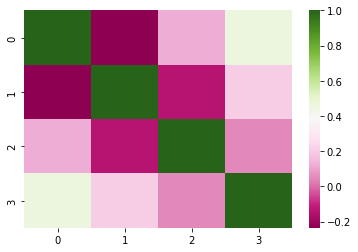

In [181]:
cor = np.corrcoef(fish.transpose())
sns.heatmap(cor,cmap='PiYG')

At this point, I am confused a little bit. Because in the question it says "the first 5 columns are the explanatory variables" and I decided the take the columns from 0 to 5 which makes 6.

Then we should prepare our data

In [169]:
X=fish[6]
X

0      3.770
1      3.115
2      3.531
3      3.510
4      5.390
       ...  
903    3.109
904    4.040
905    4.818
906    5.317
907    8.201
Name: 6, Length: 908, dtype: float64

In [170]:
Y=fish.drop(6, inplace=True, axis=1)



In [171]:
fish

,0,1,2,3,4,5
0,3.260,0.829,1.676,0,1,1.453
1,2.189,0.580,0.863,0,0,1.348
2,2.125,0.638,0.831,0,0,1.348
3,3.027,0.331,1.472,1,0,1.807
4,2.094,0.827,0.860,0,0,1.886
...,...,...,...,...,...,...
903,2.801,0.728,2.226,0,2,0.736
904,3.652,0.872,0.867,2,3,3.983
905,3.763,0.916,0.878,0,6,2.918
906,2.831,1.393,1.077,0,1,0.906


In [174]:
model_fish = sm.OLS(X, fish)
results=model_fish.fit()
results.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      6   R-squared (uncentered):                   0.944
Model:                            OLS   Adj. R-squared (uncentered):              0.944
Method:                 Least Squares   F-statistic:                              2549.
Date:                Tue, 29 Mar 2022   Prob (F-statistic):                        0.00
Time:                        21:12:46   Log-Likelihood:                         -1305.4
No. Observations:                 908   AIC:                                      2623.
Df Residuals:                     902   BIC:                                      2652.
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
0              0.7402      0.057     12.916      0.000       0.628       0.853
1              1.7388      0.083     20.943      0.000       1.576       1.902
2             -0.1579      0.095     -1.654      0.098      -0.345       0.029
3              0.4793      0.058      8.274      0.000       0.366       0.593
4             -0.0433      0.043     -1.016      0.310      -0.127       0.040
5              0.4154      0.036     11.455      0.000       0.344       0.487
==============================================================================
Omnibus:                       91.058   Durbin-Watson:                   1.912
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              505.757
Skew:                           0.243   Prob(JB):                    1.50e-110
Kurtosis:                       6.624   Cond. No.                         14.6
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

We should eliminate the columns 2 and 4 as similar to Q1

In [175]:
Y=fish.drop(2, inplace=True, axis=1)
Y=fish.drop(4, inplace=True, axis=1)

In [176]:
fish

,0,1,3,5
0,3.260,0.829,0,1.453
1,2.189,0.580,0,1.348
2,2.125,0.638,0,1.348
3,3.027,0.331,1,1.807
4,2.094,0.827,0,1.886
...,...,...,...,...
903,2.801,0.728,0,0.736
904,3.652,0.872,2,3.983
905,3.763,0.916,0,2.918
906,2.831,1.393,0,0.906


In [177]:
model_fish = sm.OLS(X, fish)
results=model_fish.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      6   R-squared (uncentered):                   0.944
Model:                            OLS   Adj. R-squared (uncentered):              0.944
Method:                 Least Squares   F-statistic:                              3817.
Date:                Tue, 29 Mar 2022   Prob (F-statistic):                        0.00
Time:                        21:16:20   Log-Likelihood:                         -1307.0
No. Observations:                 908   AIC:                                      2622.
Df Residuals:                     904   BIC:                                      2641.
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
0              0.6507      0.025     26.068      0.000       0.602       0.700
1              1.6650      0.072     22.995      0.000       1.523       1.807
3              0.4678      0.057      8.223      0.000       0.356       0.579
5              0.4567      0.028     16.545      0.000       0.403       0.511
==============================================================================
Omnibus:                       91.944   Durbin-Watson:                   1.924
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              505.967
Skew:                           0.256   Prob(JB):                    1.35e-110
Kurtosis:                       6.621   Cond. No.                         8.43
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Our R-squared and Adj. R-squared looks good and all of P>|t| values are 0.000